# Tarea 1
### Reconocimiento de Patrones en Minería de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import *
import scipy

df = pd.read_csv('beer_reviews/beer_reviews.csv')

df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [32]:
print "Dimensiones del dataset: ",df.shape
beer_names = set(df.beer_name)
print "Cantidad de nombres de cervezas distintas: ",len(beer_names)
profile = set(df.review_profilename)
print "Cantidad de nombres de perfiles de usuarios distintos: ",len(profile)
styles = set(df.beer_style)
print "Cantidad de tipos de cervezas distintos: ",len(styles)
names = set(df.brewery_name)
print "Cantidad de nombres distribuidoras de cervezas distintas: ",len(names)

#posibles etiquetas
n_beer_style =len(styles)
n_brewery_name = len(names)

Dimensiones del dataset:  (10000, 13)
Cantidad de nombres de cervezas distintas:  4923
Cantidad de nombres de perfiles de usuarios distintos:  4118
Cantidad de tipos de cervezas distintos:  104
Cantidad de nombres distribuidoras de cervezas distintas:  1465


In [2]:
#transforma a categorico
df["brewery_name"] = df["brewery_name"].astype('category')
df["beer_style"] = df["beer_style"].astype('category')
df["beer_name"] = df["beer_name"].astype('category')
df["review_profilename"] = df["review_profilename"].astype('category')

df.info()

#codifica
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null category
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null category
beer_style            1586614 non-null category
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null category
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: category(4), float64(6), int64(3)
memory usage: 126.3 MB


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,5438,1234817823,1.5,2.0,2.5,30566,65,1.5,1.5,44426,5.0,47986
1,10325,5438,1235915097,3.0,2.5,3.0,30566,51,3.0,3.0,41738,6.2,48213
2,10325,5438,1235916604,3.0,2.5,3.0,30566,59,3.0,3.0,6887,6.5,48215
3,10325,5438,1234725145,3.0,3.0,3.5,30566,61,2.5,3.0,44425,5.0,47969
4,1075,1480,1293735206,4.0,4.5,4.0,23008,9,4.0,4.5,11359,7.7,64883


Describir el dataset con todo  lo descrito

es necesario trabajar con los atributos numericos reales (continuos )con kmeans por ejemplo ya que este calcula media arimetica

### Proyecta a 2d

In [4]:
#se toma una muestra  de tamanno N y explicar porque
np.random.seed(4711)  # for repeatability of this
df_sample = df.sample(1000)

In [10]:
#beer abv tiene nan 
df_sample['beer_abv'].fillna(0, inplace=True)

columns = ['review_overall','review_aroma','review_appearance','review_palate','review_taste']
           #'beer_abv'] # 'brewery_name','beer_style','review_profilename', 'beer_name','review_time'

df_numericos = df_sample.ix[:,columns]
X = df_numericos.as_matrix()
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn import manifold
#X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X_std)
#X_red = manifold.TSNE(n_components=2).fit_transform(X_std)

from sklearn.decomposition import PCA
X_red = PCA(n_components=2).fit_transform(X_std)

In [6]:
df_numericos.describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,3.821250,3.751600,3.854850,3.74780,3.800050
std,0.718488,0.683223,0.611796,0.67675,0.723566
min,1.000000,1.000000,1.000000,1.00000,1.000000
25%,3.500000,3.500000,3.500000,3.50000,3.500000
50%,4.000000,4.000000,4.000000,4.00000,4.000000
75%,4.500000,4.000000,4.000000,4.00000,4.500000
max,5.000000,5.000000,5.000000,5.00000,5.000000


a pesar que los atributos ya vienen en un mismo rango y son representan las mismas unidades, es necesario central para poder realizar una proyeccion de los datos

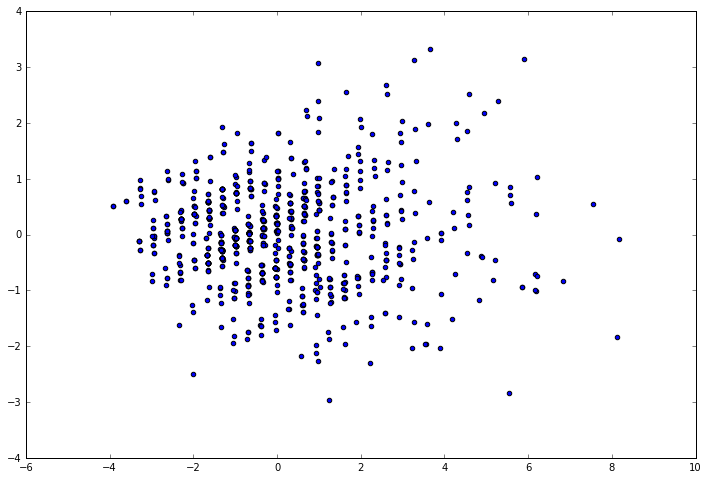

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(X_red[:,0],X_red[:,1])
plt.show()

## K-means

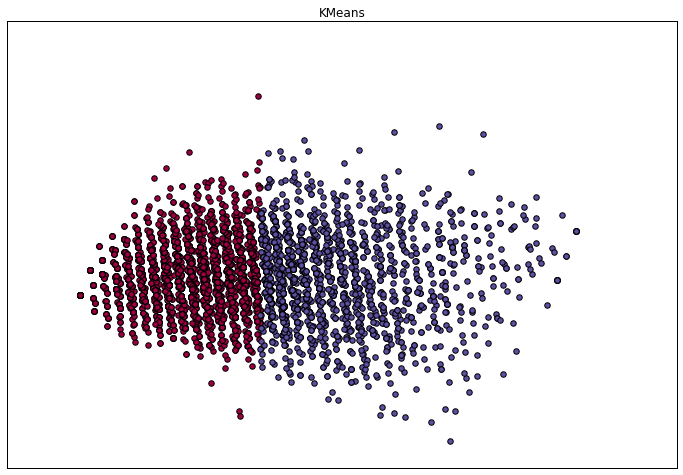

In [24]:
from sklearn.cluster import KMeans
k = 2
#se ajusta kMeans aa los datos
k_means = KMeans(init="random", n_clusters=k, n_init=10)
#init = "k-means++"

k_means.fit(X)


k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

#se grafica
plt.figure(figsize=(12,8))
plt.title('KMeans')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,k)]
for k, col in zip(range(k), mcolors):
    my_members = k_means_labels == k
    plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
plt.xticks(())
plt.yticks(())
plt.show()

## Mini batch K-means

In [3]:
df = pd.read_csv('beer_reviews/beer_reviews.csv').sample(1000)
df_numericos = df.ix[:,['review_overall','review_aroma','review_appearance','review_palate','review_taste']]
X = df_numericos.as_matrix()

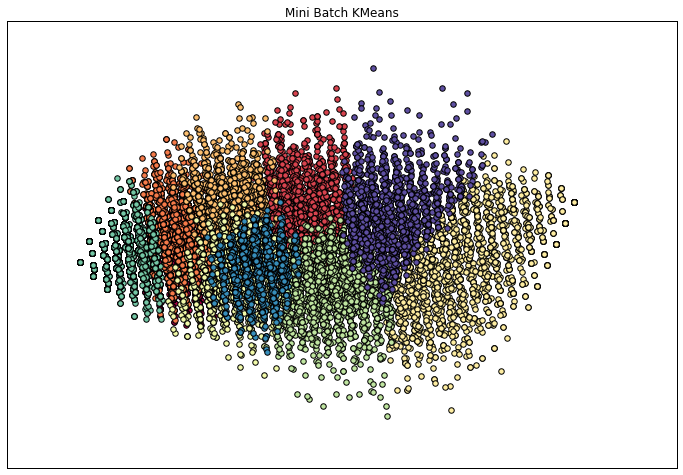

In [50]:
from sklearn.cluster import MiniBatchKMeans
k = 10
#se ajusta mini batch kMeans aa los datos
k_means = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=10)
#init : {‘k-means++’, ‘random’ or an ndarray}, default: ‘k-means++’

k_means.fit(X)

from sklearn import manifold
#se proyecta a dos dimensiones para presentar los cluster
#X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)

mini_k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

#se grafica
plt.figure(figsize=(12,8))
plt.title('Mini Batch KMeans')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,k)]
for k, col in zip(range(k), mcolors):
    my_members = mini_k_means_labels == k
    plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
    
plt.xticks(())
plt.yticks(())
plt.show()

## HAC complete

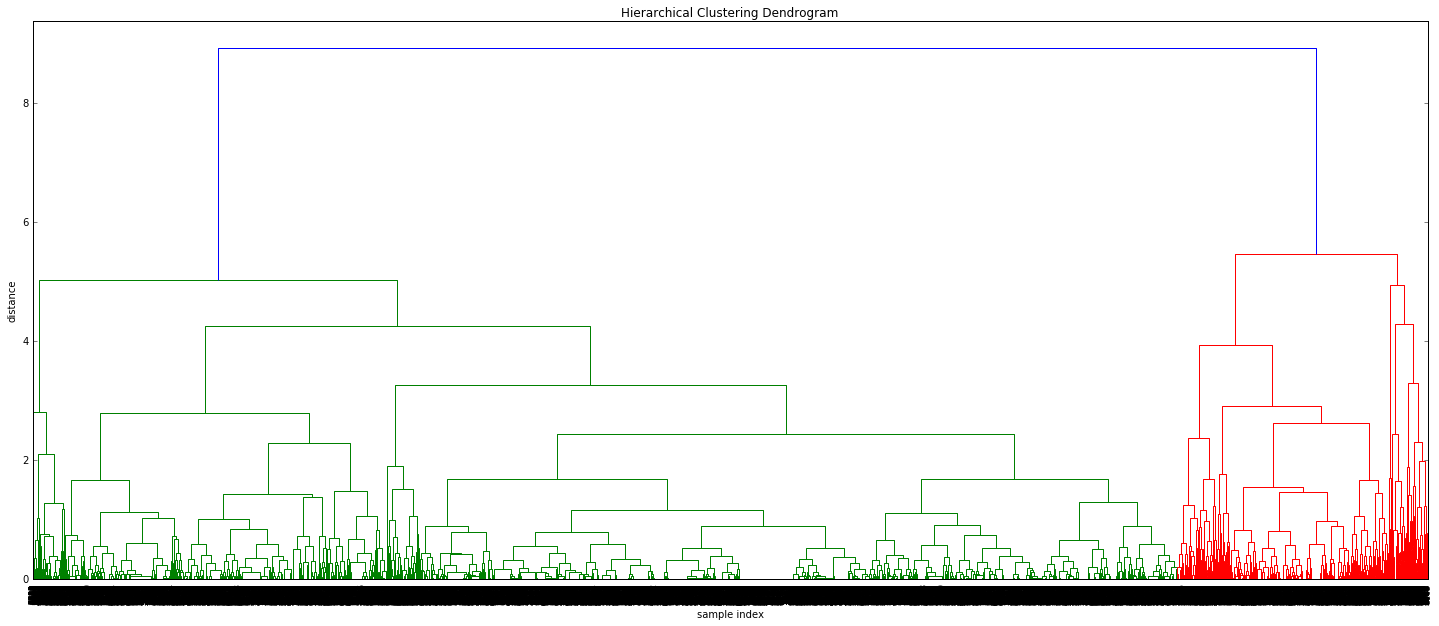

In [28]:
#codigo desde: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_red, 'complete') # o X

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

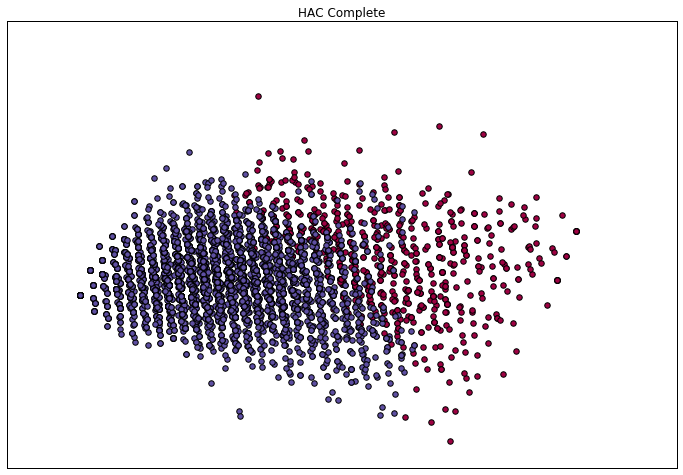

NameError: name 'numpy' is not defined

In [20]:
from sklearn.cluster import AgglomerativeClustering as hac
#se ajusta algortmo Hac
k = 2
clustering = hac(linkage="complete", n_clusters=k, affinity="euclidean")
#affinity : string or callable, default: “euclidean”
#Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or ‘precomputed’.

clustering.fit(X)

HAC_labels = clustering.labels_

#se grafica
plt.figure(figsize=(12,8))
plt.title('HAC Complete')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,k)]
for k, col in zip(range(k), mcolors):
    my_members = HAC_labels == k
    plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
    
plt.xticks(())
plt.yticks(())
plt.show()

x_min, x_max = numpy.min(X_red, axis=0), numpy.max(X_red, axis=0)
X_red = (X_red - x_min)/(x_max - x_min)
for i in range(X_red.shape[0]):
	plt.text(X_red[i,0], X_red[i,1], str(y[i]),
	color=plt.cm.spectral(clustering.labels_[i]/10.),
	fontdict={'weight': 'bold', 'size': 8})

plt.show()


## Ward

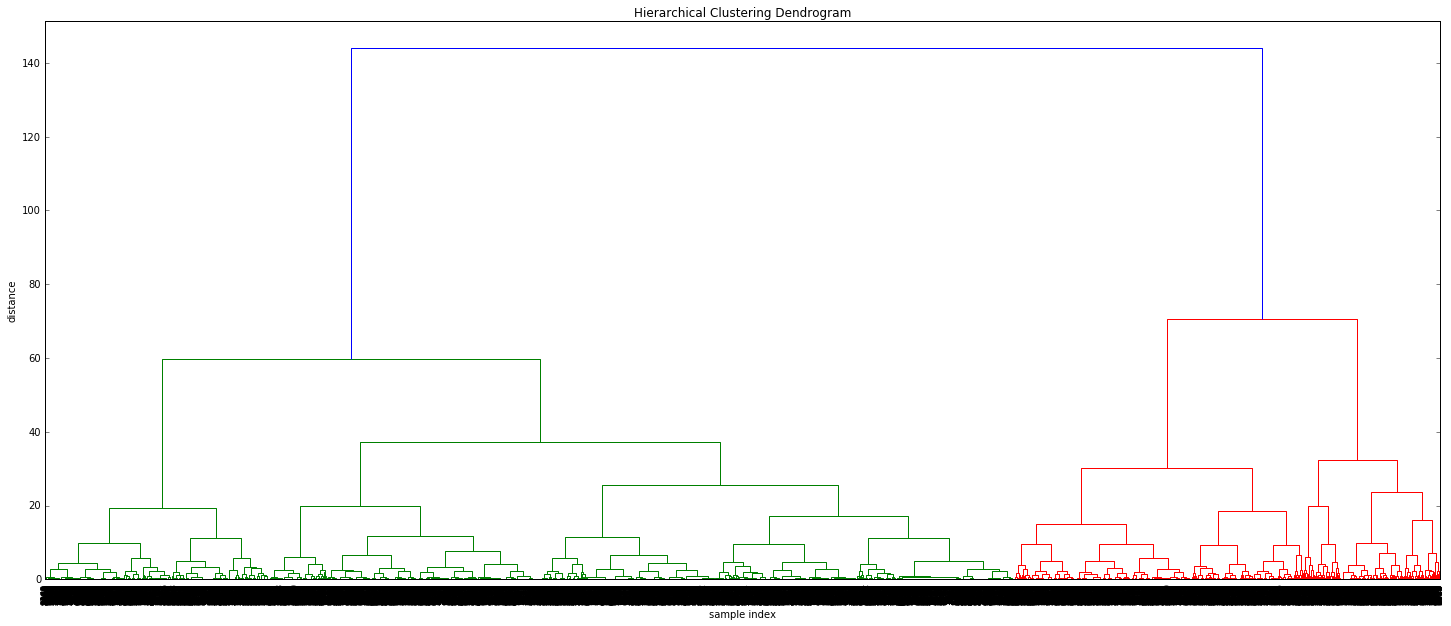

In [29]:
#codigo desde: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_red, 'ward') # o X

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

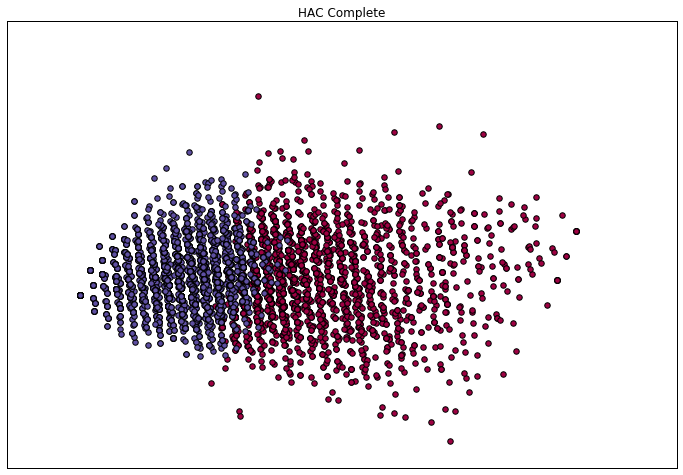

In [21]:
#se ajusta algortmo Ward
from sklearn.cluster import AgglomerativeClustering as hac
k = 2
clustering = hac(linkage="ward", n_clusters=k, affinity='euclidean')
clustering.fit(X)

Ward_labels = clustering.labels_

#se grafica
plt.figure(figsize=(12,8))
plt.title('HAC Complete')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,k)]
for k, col in zip(range(k), mcolors):
    my_members = Ward_labels == k
    plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
    
plt.xticks(())
plt.yticks(())
plt.show()

## DBScan

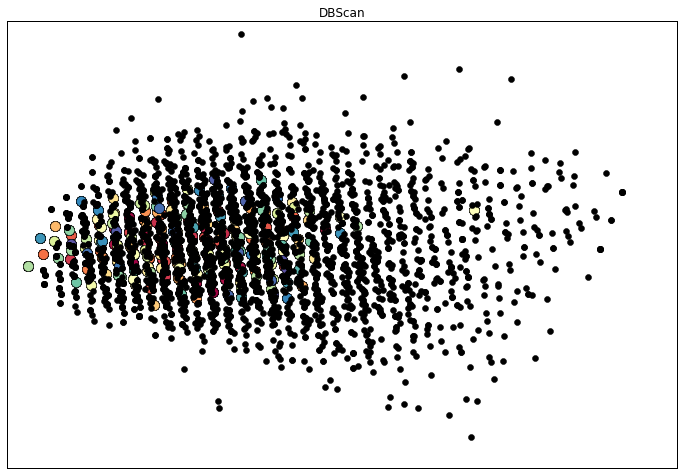

In [22]:
from sklearn.cluster import DBSCAN
plt.clf()

#se ajusta algortmo DBSCAN
clustering = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')
 
clustering.fit(X)

DBScan_labels = clustering.labels_
unique_labels = set(clustering_labels)
core_samples_mask = np.zeros_like(clustering.labels_, dtype = bool)
core_samples_mask[clustering.core_sample_indices_] = True

#se grafica
plt.figure(figsize=(12,8))
plt.title('DBScan')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,len(unique_labels))]
for k, col in zip(unique_labels, mcolors):
    if k == -1:
        col = 'k'

    class_member_mask = (DBScan_labels == k)

    xy = X_red[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    xy = X_red[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    
    
    #my_members = clustering_labels == k
    #plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
    
plt.xticks(())
plt.yticks(())
plt.show()

## Buscando una etiqueta

¿Qu ́e atributo, Nombre de cervecer ́ıa o Tipo de cerveza, describe mejor a los cluster como eti-
quetas de clase, seg ́
un los resultados obtenidos previamente? ¿Hay mejores marcas que otras en
relaci ́
on a las evaluaciones obtenidas? ¿Se puede definir alg ́
un criterio para determinar el mejor
tipo de cerveza? Comente.

In [18]:
from sklearn import metrics

#volver a cargar la data si esque hay muestreo dsitinto en cada caso
posible_etiqueta1 = df_sample.brewery_name
#df.brewery_name.as_matrix()[:1000] #ver esto
posible_etiqueta2 = df_sample.beer_style
#df.beer_style.as_matrix()[:1000]

In [25]:
#con k = cantidad de nombres de cerveza
cluster_etiquetas = k_means_labels

print "Nombre de cerveceria como etiqueta"
possible_etiquetas = posible_etiqueta1 

# escenario supervisado de evaluacion
print metrics.adjusted_rand_score(possible_etiquetas, cluster_etiquetas) # test w shifted y random
print metrics.normalized_mutual_info_score(possible_etiquetas, cluster_etiquetas)
print metrics.homogeneity_score(possible_etiquetas, cluster_etiquetas)
print metrics.completeness_score(possible_etiquetas, cluster_etiquetas)
print metrics.v_measure_score(possible_etiquetas, cluster_etiquetas)
print metrics.fowlkes_mallows_score(possible_etiquetas, cluster_etiquetas)

# escenario no supervisado de evaluacion
print metrics.silhouette_score(X, cluster_etiquetas, metric='euclidean')

Nombre de cerveceria como etiqueta
0.00202745625851
0.107361338733
0.0331287394816
0.347929237119
0.0604971304228
0.0658337282027
0.43023651699
Tipo de cerveza como etiqueta
0.00728232938227
0.0556095187884
0.0208316671198
0.148447964442
0.0365362158618
0.134343863685
0.43023651699


In [ ]:
#con k = cantidad de tipos de cerveza
cluster_etiquetas = k_means_labels

print "Tipo de cerveza como etiqueta"
possible_etiquetas = posible_etiqueta2

# escenario supervisado de evaluacion
print metrics.adjusted_rand_score(possible_etiquetas, cluster_etiquetas) # test w shifted y random
print metrics.normalized_mutual_info_score(possible_etiquetas, cluster_etiquetas)
print metrics.homogeneity_score(possible_etiquetas, cluster_etiquetas)
print metrics.completeness_score(possible_etiquetas, cluster_etiquetas)
print metrics.v_measure_score(possible_etiquetas, cluster_etiquetas)
print metrics.fowlkes_mallows_score(possible_etiquetas, cluster_etiquetas)

# escenario no supervisado de evaluacion
print metrics.silhouette_score(X, cluster_etiquetas, metric='euclidean')